# **KMeans Clustering**

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("/content/sample_data/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


<Axes: xlabel='Age', ylabel='Income'>

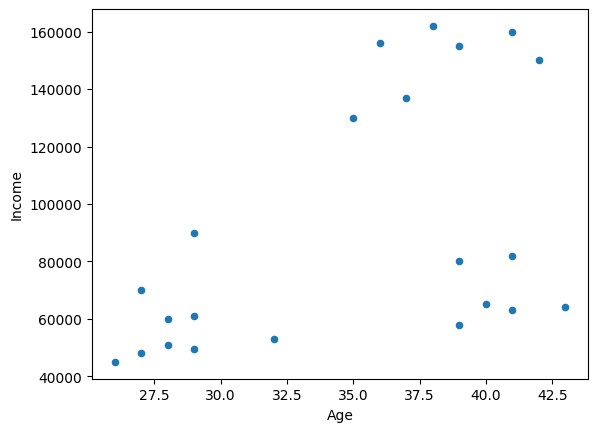

In [8]:
%matplotlib inline
df.rename(columns={'Income($)': 'Income'}, inplace=True)
df.plot(kind="scatter",x="Age", y = "Income")

In [9]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df[["Age","Income"]])
y_predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [10]:
df['cluster']=y_predict
df.head()

,Name,Age,Income,cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [11]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

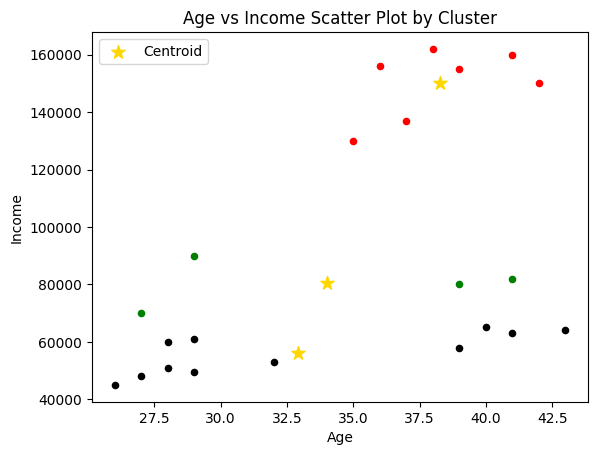

In [14]:

import matplotlib.pyplot as plt

# Rename the column to avoid special characters
df.rename(columns={'Income($)': 'Income'}, inplace=True)

# Segmenting the DataFrame based on cluster labels
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot each cluster on the same axis
df1.plot(kind="scatter", x="Age", y="Income", color='green', ax=ax)
df2.plot(kind="scatter", x="Age", y="Income", color='red',  ax=ax)
df3.plot(kind="scatter", x="Age", y="Income", color='black', ax=ax)

# Scatter plot for cluster centroids
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='Gold', marker='*', s=100, label='Centroid')

# Adding labels and title
plt.title('Age vs Income Scatter Plot by Cluster')
plt.legend()

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [15]:
scaler = MinMaxScaler()

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [16]:
df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


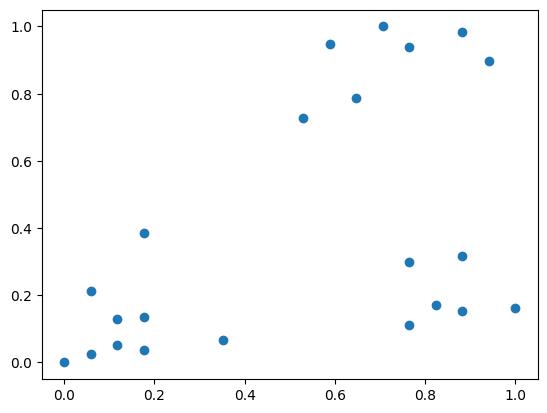

In [17]:
plt.scatter(df.Age,df.Income)

In [18]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [19]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0


In [20]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428]])

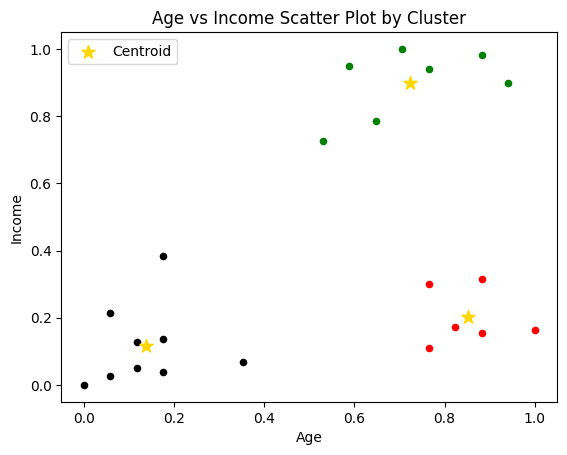

In [21]:
import matplotlib.pyplot as plt

# Rename the column to avoid special characters
df.rename(columns={'Income($)': 'Income'}, inplace=True)

# Segmenting the DataFrame based on cluster labels
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot each cluster on the same axis
df1.plot(kind="scatter", x="Age", y="Income", color='green', ax=ax)
df2.plot(kind="scatter", x="Age", y="Income", color='red',  ax=ax)
df3.plot(kind="scatter", x="Age", y="Income", color='black', ax=ax)

# Scatter plot for cluster centroids
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='Gold', marker='*', s=100, label='Centroid')

# Adding labels and title
plt.title('Age vs Income Scatter Plot by Cluster')
plt.legend()

<h4 style='color:purple'>Elbow Plot</h4>

In [24]:
sse = []
k= range(1,10)
for i in k:
    km = KMeans(n_clusters=i)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

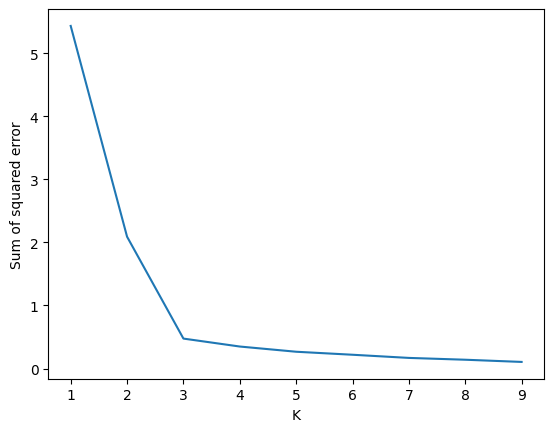

In [26]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k,sse)